In [1]:
import pandas as pd
import numpy as np
import wbgapi as wb
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
# geopandas
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes
import folium
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

In [ ]:
Emissions of carbon dioxide are those that come from the burning of fossil fuels.
They consist of gas flaring and carbon dioxide produced during the consumption of solid, liquid, and gas fuels.
Decomposition, oceanic release, and respiration are a few sources of CO2 emissions. 
This investigation focuses on the CO2 emissions that were produced between the years 1980 and 2030 in various nations.
To meet this requirement, two clusters have been formed.
The primary benefit of this activity I is that it allows us to gauge the risk posed by CO2 emissions and take the necessary precautions to keep them under control.

In [2]:
# this function is return the dataframe form world bank
def world_bank(filename):
    
    """it's return the data frame from world bank with filename. """
    
    countries = ["IND","USA","CHN","NGA","NPL","NZL","AUS","AUT","BGD","CAN","AFG",'ALB','DZA','AND','ARG']
    data = wb.data.DataFrame(filename, countries, time = range(2008,2018))
    return data

# print power consumption KWh and population growth%
indicator_code = 'EN.ATM.CO2E.PC'
data = world_bank(indicator_code)

In [3]:
# reset the all the index's
df = data.reset_index()

# without Normalization

In [4]:
pca = PCA(n_components = 2)
pca.fit(df.iloc[:,1:])

PCA(n_components=2)

In [5]:
df_pca = pca.transform(df.iloc[:,1:])
df_pca = pd.concat([df.reset_index(drop = True),pd.DataFrame(df_pca)], axis= 1)
df_pca.columns.values[-2: ] = ['component1','component2']

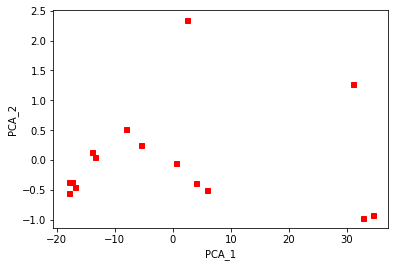

In [6]:
#plot x and y values
x = df_pca['component1']
y = df_pca['component2']

plt.figure()
plt.plot(x, y, "rs", markersize=5)
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.show()

In [7]:
#ElBOW method use to find clusters
wcss=[] # Within-Cluster-Sum-of-Squares
# Code to get max no of clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(df_pca[['component1',"component2"]])
    wcss.append(kmeans.inertia_)

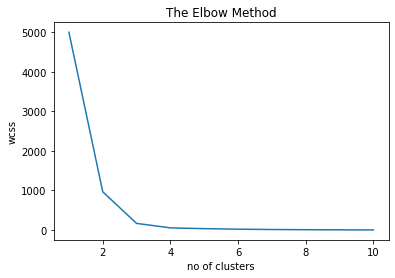

In [8]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

[0 0 0 0 1 0 0 1 0 0 0 0 0 0 1]
[[-8.19754305  0.05058341]
 [32.79017219 -0.20233363]]


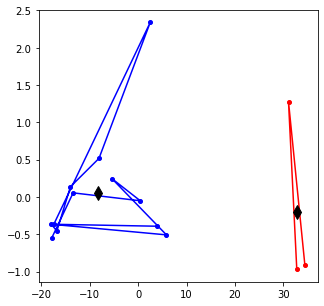

In [9]:
xy = df_pca[['component1','component2']]

kmeans = cluster.KMeans(n_clusters=2)
# Fit the data, results are stored in the kmeans object
kmeans.fit(xy) # fit done on x,y pairs
labels = kmeans.labels_
print(labels) # labels is the number of the associated clusters of (x,y)␣

# extract the estimated cluster centres
cen = kmeans.cluster_centers_
print(cen)
# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))
col = ["blue", "red","green"]
for l in range(0,2): # loop over the different labels
    plt.plot(x[labels==l], y[labels==l], "go-", markersize=4, color=col[l])
# show cluster centres
for ic in range(2):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)
#plt.xlabel("x")
#plt.ylabel("y")
plt.show()

In [10]:
from sklearn.metrics import silhouette_score
score = silhouette_score(xy, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.753


# with Normalization

In [11]:
def normalization(data):
    
    """return the normalized data using minmax scaler"""
    
    scaler = MinMaxScaler()
    scaler.fit(data)
    df_norm = scaler.transform(data)

    return df_norm
df_nr = normalization(df.iloc[:,1:])

In [12]:
#pd.DataFrame(df_nr)

In [13]:
# PCA Normalize data
df_nr_pca = PCA(n_components = 2)
df_nr_pca.fit(df_nr)

df_nr_pca = df_nr_pca.transform(df_nr)
df_nr_pca = pd.concat([df.reset_index(drop = True),pd.DataFrame(df_nr_pca)], axis= 1)
df_nr_pca.columns.values[-2: ] = ['component1','component2']

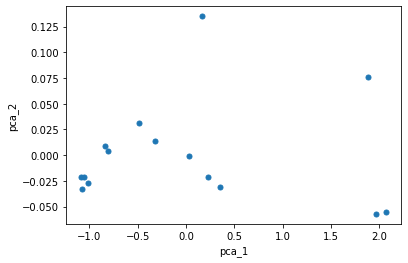

In [14]:
# plot x y values
x = df_nr_pca['component1']
y = df_nr_pca['component2']

# What did we get?
plt.figure()
plt.plot(x, y, "o", markersize=5)
plt.xlabel("pca_1")
plt.ylabel("pca_2")
plt.show()

In [15]:
# ElBOW method use to find clusters
wcss=[] # Within-Cluster-Sum-of-Squares
# Code to get max no of clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(df_nr_pca.iloc[:,2:])
    wcss.append(kmeans.inertia_)

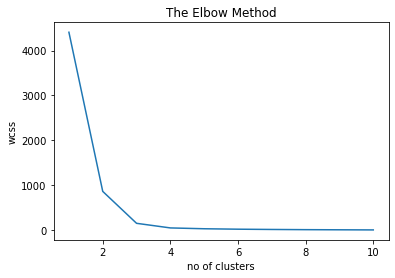

In [16]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

[1 1 1 1 0 1 1 0 1 1 1 1 1 1 0]
[[ 1.97018637 -0.01227541]
 [-0.49254659  0.00306885]]


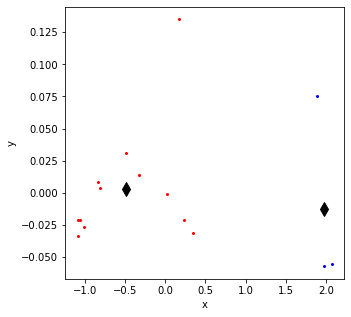

In [17]:
# kmeans clustring method
xy = df_nr_pca[['component1','component2']]

kmeans = cluster.KMeans(n_clusters=2)
# Fit the data, results are stored in the kmeans object
kmeans.fit(xy) # fit done on x,y pairs
labels = kmeans.labels_
print(labels) # labels is the number of the associated clusters of (x,y)␣

# extract the estimated cluster centres
cen = kmeans.cluster_centers_
print(cen)
# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))
col = ["blue", "red","green"]
for l in range(0,2): # loop over the different labels
    plt.plot(x[labels==l], y[labels==l], ".", markersize=4, color=col[l])
# show cluster centres
for ic in range(2):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [18]:
from sklearn.metrics import silhouette_score
score = silhouette_score(xy, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.753


[0 0 0 0 1 0 0 1 0 0 0 0 0 0 1]
[[ 1.97018637 -0.01227541]
 [-0.49254659  0.00306885]]


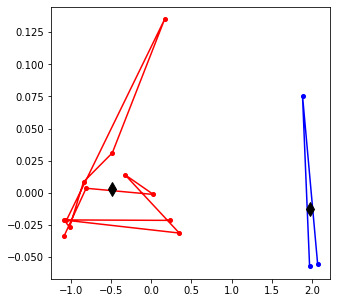

In [19]:
#AgglomerativeClustering method
ap = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
ap.fit_predict(xy)

ap_labels = ap.labels_
print(ap_labels) # labels is the number of the associated clusters of (x,y)␣

# extract the estimated cluster centres
#cen = ap.cluster_centers_
print(cen)
# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))
col = ["blue", "red","green"]
for l in range(0,3): # loop over the different labels
    plt.plot(x[labels==l], y[labels==l], "go-", markersize=4, color=col[l])
# show cluster centres
for ic in range(2):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)
#plt.xlabel("x")
#plt.ylabel("y")
plt.show()

In [20]:
from sklearn.metrics import silhouette_score
score = silhouette_score(xy,ap.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.753


In [21]:
df_nr_pca['clusters'] = ap.labels_

In [38]:
df_nr_pca = df_nr_pca.rename(columns={'economy':'Countries'})
df_nr_pca

,Countries,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,component1,component2,clusters
0,AFG,0.158356,0.211306,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,-1.079004,-0.033144,0
1,ALB,1.414848,1.475652,1.572251,1.734823,1.579092,1.654524,1.806789,1.759987,1.714126,1.948872,-0.807810,0.003658,0
2,AND,6.439304,6.156688,6.157198,5.850886,5.944654,5.942801,5.807128,6.026182,6.080600,6.104134,0.026908,-0.001166,0
3,ARG,4.195343,3.889060,4.122245,4.296015,4.277882,4.359886,4.216361,4.314434,4.227539,4.089472,-0.324798,0.014120,0
4,AUS,18.283041,18.207425,17.581445,17.268110,16.969257,16.398646,15.755876,15.786449,15.872080,15.738647,2.066076,-0.055305,1
5,AUT,8.499674,7.721144,8.365015,8.135475,7.723614,7.753700,7.253384,7.306745,7.255627,7.482751,0.348321,-0.031169,0
6,BGD,0.288141,0.306665,0.342740,0.364567,0.384025,0.396566,0.412899,0.458798,0.466776,0.492907,-1.052115,-0.021248,0
7,CAN,16.548803,15.486682,15.733914,15.950225,15.761263,15.858129,15.854138,15.651386,15.244747,15.385316,1.878244,0.075618,1
8,CHN,5.431610,5.795344,6.332166,6.898148,7.039788,7.289017,7.212791,7.124223,7.071898,7.174948,0.165892,0.134976,0
9,DZA,2.994189,3.191554,3.144748,3.222460,3.387555,3.406123,3.566209,3.674233,3.535020,3.505748,-0.482975,0.031137,0


In [49]:
# create world map from clustring data
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.drop(['pop_est','gdp_md_est'],axis=1)

In [50]:
table = world.merge(df_nr_pca[['Countries','clusters','YR2017']],how='left',left_on=['iso_a3'],right_on=['Countries'])
table = table.dropna()
table.explore(column='Countries', name='clusters')

In [ ]:
From the geographical graph, some countries like newzealand,china,india,Afghanistan,Albania, austria, Algeria are segregated into cluster 1 and countries like USA, canada, australia are segregated into 2nd cluster.

# Fitting

In [25]:
import scipy.optimize as opt

In [26]:
# this function is read dataframe
def read_data(name):
    """ return the dataframe,name is a file name."""
    data = pd.read_csv(name)
    return data

data = read_data('emission_fitting.csv') 

In [27]:
# change column names.
data.columns= ['Name','Series Code','Country Name','code','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']

In [28]:
# create new dataframe
x = data.columns[4:].T.tolist()
y = data.iloc[0:1,4:].T
y.reset_index(drop=True, inplace=True)
y = y[0].tolist()
dic = {'year':x,"CO2 emission":y}
df = pd.DataFrame(dic)
# all string values in to flot data type
df = df.apply (pd.to_numeric,errors='coerce')
df.dropna()
df.reset_index(drop=True).head()

,year,CO2 emission
0,2004,0.962436
1,2005,0.991400
2,2006,1.041840
3,2007,1.129217
4,2008,1.185905


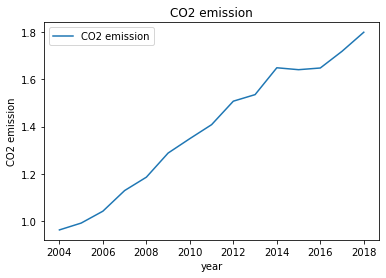

In [57]:
# year wise plot CO2 emissions
df.plot('year','CO2 emission')
plt.ylabel("CO2 emission")
plt.title('CO2 emission')

plt.show()

By using the above plot, we are checking the trend of range of co2 emissions from 2004-2018 and we can see the emissions are increasing every year.

# logistic function

In [30]:
def logistic(t, n0, g, t0):
    """Calculates the logistic function with scale factor n0 and growth rate g"""
    
    f = n0 / (1 + np.exp(-g*(t - t0)))
    
    return f

# Curve_fit

In [31]:
param, covar = opt.curve_fit(logistic, df["year"], df["CO2 emission"], 
                             p0=(3e12, 0.03, 2000.0))

parameters: [2.12269741e+00 1.36179733e-01 2.00590404e+03]
std. dev. [0.11873598 0.0159462  0.79952404]


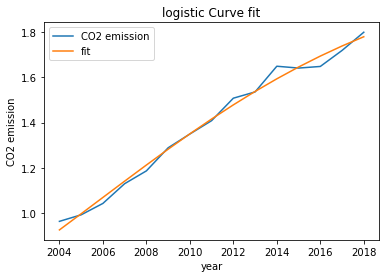

In [58]:
sigma = np.sqrt(np.diag(covar))
print("parameters:", param)
print("std. dev.", sigma)

df["fit"] = logistic(df["year"], *param)

df.plot("year", ["CO2 emission", "fit"])
plt.ylabel("CO2 emission")
plt.title('logistic Curve fit')

plt.savefig('Curve fit.jpg')

From the figure by applying curve fit, we are trying to identify large interval of data for which the 
proportional growth rate is linear. We can exactly 
see this phenomenon from the graph for features
co2 emissions and year for the country India.

# err_ranges

In [33]:
def err_ranges(x, func, param, sigma):
    """ calculate the error ranges"""
   

    import itertools as iter
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper 

In [34]:
year = np.arange(1980, 2031)
print(year)
forecast = logistic(year, *param)

[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022 2023 2024 2025 2026 2027 2028 2029]


In [35]:
low, up = err_ranges (year, logistic, param, sigma)

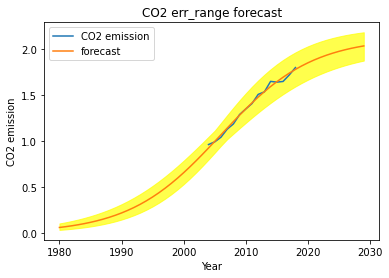

In [59]:
plt.figure()
plt.plot(df["year"], df["CO2 emission"], label="CO2 emission")
plt.plot(year, forecast, label="forecast")

plt.fill_between(year, low, up, color="yellow", alpha=0.7)
plt.ylabel("CO2 emission")
plt.xlabel("Year")
plt.title('CO2 err_range forecast')
plt.legend()

plt.savefig('CO2 forecast.jpg')

In [37]:
print(err_ranges(2030, logistic, param, sigma))

(1.8891956424421692, 2.191772544636173)
